<a href="https://colab.research.google.com/github/N02468/Machine-Learning-Models/blob/main/Machine_Learning_Models_RENEWED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
# For time series prediction (trend prediction)
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import tensorflow as tf

In [12]:
df = pd.read_csv("combined_data.csv")
df.head()  # Display the first few rows

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TMAX,TMIN,TAVG,PRCP,EMXT,EMNT,EMXP,HTDD,CLDD,DX90,DX32
0,EZE00100082,1805,50.0864,14.4164,191.0,"PRAHA KLEMENTINUM, EZ",11.13,4.80,7.97,431.7,29.1,-20.8,21.5,3815.3,82.9,0.0,38.0
1,EZE00100082,1807,50.0864,14.4164,191.0,"PRAHA KLEMENTINUM, EZ",14.01,7.41,10.71,534.1,34.2,-6.8,39.8,3016.1,360.5,9.0,10.0
2,EZE00100082,1808,50.0864,14.4164,191.0,"PRAHA KLEMENTINUM, EZ",12.42,5.67,9.04,439.6,34.1,-19.6,45.1,3340.1,261.9,3.0,40.0
3,EZE00100082,1809,50.0864,14.4164,191.0,"PRAHA KLEMENTINUM, EZ",13.04,6.60,9.82,402.9,31.2,-19.4,32.7,3539.9,225.1,0.0,19.0
4,EZE00100082,1810,50.0864,14.4164,191.0,"PRAHA KLEMENTINUM, EZ",12.99,6.03,9.51,461.9,30.1,-17.6,29.0,3479.0,183.6,0.0,36.0


In [8]:
X = df[['LATITUDE', 'LONGITUDE']]  # Example features

In [9]:
# Train the model
iso_forest = IsolationForest(contamination=0.05)  # 5% anomalies
df['anomaly'] = iso_forest.fit_predict(X)

In [10]:
# Mark anomalies with -1 (normal data points are 1)
anomalies = df[df['anomaly'] == -1]

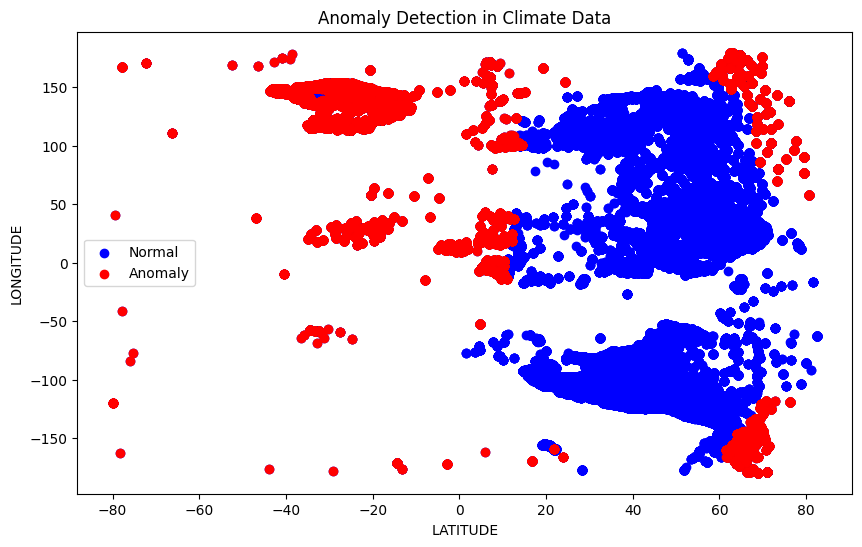

In [15]:
# Plot anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df['LATITUDE'], df['LONGITUDE'], label='Normal', color='blue')
plt.scatter(anomalies['LATITUDE'], anomalies['LONGITUDE'], label='Anomaly', color='red')
plt.xlabel('LATITUDE')
plt.ylabel('LONGITUDE')
plt.title('Anomaly Detection in Climate Data')
plt.legend()
plt.show()

In [13]:
# Example: Time series trend prediction using Exponential Smoothing
df['DATE'] = pd.to_datetime(df['DATE'])  # Ensure the 'date' column is in datetime format
df.set_index('DATE', inplace=True)

In [14]:
# Use temperature as the target for prediction
model = ExponentialSmoothing(df['LATITUDE'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [ ]:
# Forecast the next 12 months (or steps)
forecast = model_fit.forecast(steps=12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


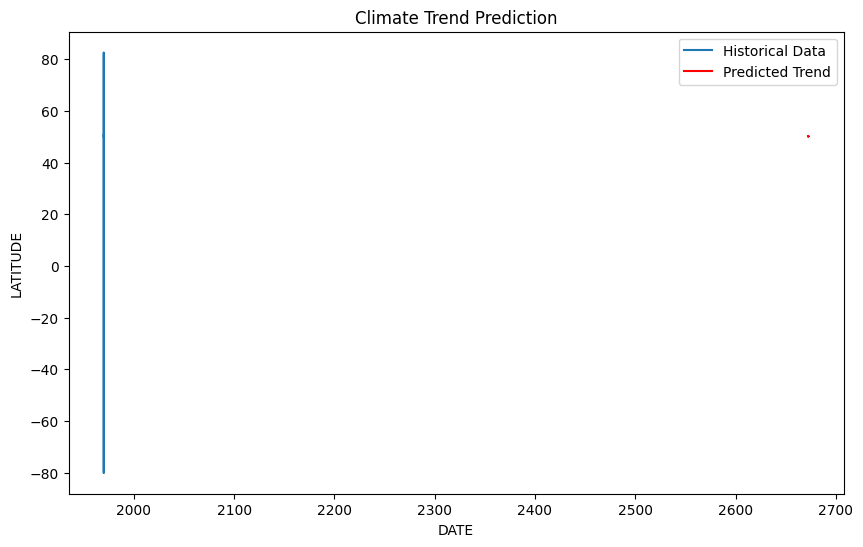

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['LATITUDE'], label='Historical Data')
plt.plot(forecast.index, forecast, label='Predicted Trend', color='red')
plt.xlabel('DATE')
plt.ylabel('LATITUDE')
plt.title('Climate Trend Prediction')
plt.legend()
plt.show()

In [ ]:
# Check the column names in the DataFrame
print(df.columns)

Index(['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'TMAX', 'TMIN',
       'TAVG', 'PRCP', 'EMXT', 'EMNT', 'EMXP', 'HTDD', 'CLDD', 'DX90', 'DX32',
       'anomaly'],
      dtype='object')


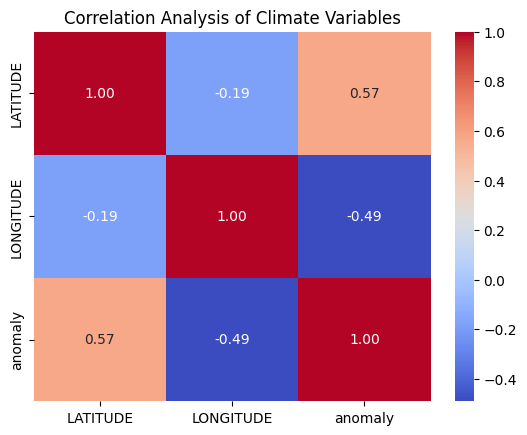

In [ ]:
# Correlation matrix
correlation_matrix = df[['LATITUDE', 'LONGITUDE', 'anomaly']].corr()

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Analysis of Climate Variables')
plt.show()

In [ ]:
X_new = df[['LATITUDE', 'LONGITUDE']]
iso_forest.fit(X_new)
df['anomaly'] = iso_forest.predict(X_new)

In [ ]:

y_true = df['LATITUDE']
y_pred = model_fit.forecast(steps=len(df))


mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error: {mse}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error: 273147.5459590587


In [ ]:
import joblib

# Save model
joblib.dump(iso_forest, 'iso_forest_model.pkl')

# Load model for future use
model = joblib.load('iso_forest_model.pkl')
